In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import datetime
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [3]:
pd.set_option('max_colwidth', 200)
walmart_df = pd.read_csv("Resources/walmart_cleaned.csv")
walmart_df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [4]:
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'])
walmart_df['week_of_year'] = walmart_df['Date'].dt.isocalendar().week
walmart_df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week_of_year
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,5
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,5
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,5
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,5
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,5


In [5]:
walmart_df.columns

Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size',
       'week_of_year'],
      dtype='object')

In [6]:
walmart_df = walmart_df[['Store', 'Date', 'week_of_year', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']]

In [7]:
walmart_df = walmart_df.drop(columns=['Dept'])
walmart_df.head()

,Store,Date,week_of_year,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,2010-02-05,5,0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,2010-02-05,5,0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,1,2010-02-05,5,0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,1,2010-02-05,5,0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,1,2010-02-05,5,0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [8]:
walmart_df['IS_XMAS'] = 0
walmart_df['IS_SUPERBOWL'] = 0
walmart_df['IS_TGIVING'] = 0
walmart_df['IS_LABORDAY'] = 0

In [9]:
walmart_df.head()

,Store,Date,week_of_year,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IS_XMAS,IS_SUPERBOWL,IS_TGIVING,IS_LABORDAY
0,1,2010-02-05,5,0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0,0,0,0
1,1,2010-02-05,5,0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0,0,0,0
2,1,2010-02-05,5,0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0,0,0,0
3,1,2010-02-05,5,0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0,0,0,0
4,1,2010-02-05,5,0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0,0,0,0


In [10]:
walmart_df.loc[walmart_df['week_of_year'] == 52, 'IS_XMAS'] = 1
walmart_df.loc[walmart_df['week_of_year'] == 6, 'IS_SUPERBOWL'] = 1
walmart_df.loc[walmart_df['week_of_year'] == 36, 'IS_LABORDAY'] = 1
walmart_df.loc[walmart_df['week_of_year'] == 47, 'IS_TGIVING'] = 1

In [11]:
walmart_df['year'] = walmart_df['Date'].dt.year
walmart_df.head()

,Store,Date,week_of_year,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,IS_XMAS,IS_SUPERBOWL,IS_TGIVING,IS_LABORDAY,year
0,1,2010-02-05,5,0,24924.50,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,3,151315,0,0,0,0,2010
1,1,2010-02-05,5,0,11737.12,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,3,151315,0,0,0,0,2010
2,1,2010-02-05,5,0,13223.76,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,3,151315,0,0,0,0,2010
3,1,2010-02-05,5,0,37.44,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,3,151315,0,0,0,0,2010
4,1,2010-02-05,5,0,1085.29,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,3,151315,0,0,0,0,2010


In [12]:
walmart_grouped_df = walmart_df.groupby(['Store', 'Date', 'week_of_year']).agg(
    {'Weekly_Sales': 'sum', 'Temperature': 'mean', 'Fuel_Price': 'mean', 'MarkDown1': 'mean', 'MarkDown2': 'mean', 'MarkDown3': 'mean',
     'MarkDown4': 'mean', 'MarkDown5': 'mean', 'CPI': 'mean', 'Unemployment': 'mean', 'Type': 'min', 'Size': 'min', 'IS_XMAS' : 'max', 'IS_SUPERBOWL' : 'max', 'IS_TGIVING' : 'max', 'IS_LABORDAY' : 'max', 'year': 'max' }
).reset_index()
walmart_grouped_df.head()

,Store,Date,week_of_year,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IS_XMAS,IS_SUPERBOWL,IS_TGIVING,IS_LABORDAY,year
0,1,2010-02-05,5,1643690.90,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,0,0,0,0,2010
1,1,2010-02-12,6,1641957.44,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,3,151315,0,1,0,0,2010
2,1,2010-02-19,7,1611968.17,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,3,151315,0,0,0,0,2010
3,1,2010-02-26,8,1409727.59,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,3,151315,0,0,0,0,2010
4,1,2010-03-05,9,1554806.68,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,3,151315,0,0,0,0,2010


In [13]:
# NEW: Create new columns to identify weeks that are near Thanksgiving & Christmas
walmart_df_new = walmart_df.copy()
walmart_df_new['IS_NEAR_TGIVING'] = 0
walmart_df_new['IS_NEAR_XMAS'] = 0
walmart_df_new.loc[walmart_df_new['week_of_year'].between(48, 51, inclusive = False), 'IS_NEAR_TGIVING'] = 1
walmart_df_new.loc[walmart_df_new['week_of_year'].between(43, 46, inclusive = False), 'IS_NEAR_XMAS'] = 1

walmart_df_new.head()

,Store,Date,week_of_year,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,IS_XMAS,IS_SUPERBOWL,IS_TGIVING,IS_LABORDAY,year,IS_NEAR_TGIVING,IS_NEAR_XMAS
0,1,2010-02-05,5,0,24924.50,42.31,2.572,0.0,0.0,0.0,...,8.106,3,151315,0,0,0,0,2010,0,0
1,1,2010-02-05,5,0,11737.12,42.31,2.572,0.0,0.0,0.0,...,8.106,3,151315,0,0,0,0,2010,0,0
2,1,2010-02-05,5,0,13223.76,42.31,2.572,0.0,0.0,0.0,...,8.106,3,151315,0,0,0,0,2010,0,0
3,1,2010-02-05,5,0,37.44,42.31,2.572,0.0,0.0,0.0,...,8.106,3,151315,0,0,0,0,2010,0,0
4,1,2010-02-05,5,0,1085.29,42.31,2.572,0.0,0.0,0.0,...,8.106,3,151315,0,0,0,0,2010,0,0


In [119]:
# NEW: Take the sum of Weekly_Sales for ALL stores in the region 
walmart_df_agg = walmart_df_new.groupby(['year', 'week_of_year']).agg({'Weekly_Sales': 'sum', 'Temperature': 'mean', 'Fuel_Price': 'mean', 
'CPI': 'mean', 'Unemployment': 'mean', 'IS_XMAS': 'max', 'IS_SUPERBOWL': 'max', 'IS_TGIVING': 'max', 'IS_LABORDAY': 'max', 
'IS_NEAR_TGIVING': 'max', 'IS_NEAR_XMAS': 'max'}).reset_index()

walmart_df_agg.head()

,year,week_of_year,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IS_XMAS,IS_SUPERBOWL,IS_TGIVING,IS_LABORDAY,IS_NEAR_TGIVING,IS_NEAR_XMAS
0,2010,5,49750740.50,33.277942,2.717869,167.398405,8.576731,0,0,0,0,0,0
1,2010,6,48336677.63,33.361810,2.696102,167.384138,8.567309,0,1,0,0,0,0
2,2010,7,48276993.78,37.038310,2.673666,167.338966,8.576351,0,0,0,0,0,0
3,2010,8,43968571.13,38.629563,2.685642,167.691019,8.561375,0,0,0,0,0,0
4,2010,9,46871470.30,42.373998,2.731816,167.727351,8.572689,0,0,0,0,0,0


In [120]:
# NEW: Create lag variables to improve predictions 
# Lag variables account for seasonality in the data 
# Lag1 = the previous week's sales
# Lag4 = 4 weeks ago's sales 
walmart_df_agg = walmart_df_agg.sort_values(['year', 'week_of_year'])
walmart_df_agg['Weekly_Sales_Lag1'] = walmart_df_agg['Weekly_Sales'].shift(1)
walmart_df_agg['Weekly_Sales_Lag4'] = walmart_df_agg['Weekly_Sales'].shift(4)

# Drop rows with missing values
walmart_df_agg.dropna(inplace=True)

In [121]:
# NEW: Descriptive statistics for each column 
walmart_df_agg.describe()

,year,week_of_year,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IS_XMAS,IS_SUPERBOWL,IS_TGIVING,IS_LABORDAY,IS_NEAR_TGIVING,IS_NEAR_XMAS,Weekly_Sales_Lag1,Weekly_Sales_Lag4
count,139.000000,139.000000,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,1.390000e+02,1.390000e+02
mean,2010.992806,26.374101,4.709990e+07,60.848366,3.378586,171.293518,7.944962,0.014388,0.014388,0.014388,0.021583,0.028777,0.028777,4.708856e+07,4.714286e+07
std,0.793966,13.988232,5.509590e+06,14.864859,0.420531,3.057284,0.465433,0.119517,0.119517,0.119517,0.145842,0.167784,0.167784,5.514433e+06,5.517475e+06
min,2010.000000,1.000000,3.959985e+07,29.807584,2.720901,167.065968,6.942141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.959985e+07,3.959985e+07
25%,2010.000000,15.000000,4.488059e+07,47.960843,2.902562,168.067314,7.483304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.480339e+07,4.480339e+07
50%,2011.000000,26.000000,4.615311e+07,61.275228,3.501036,171.085554,8.060868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.615311e+07,4.624957e+07
75%,2012.000000,38.000000,4.766901e+07,74.341924,3.739431,174.388392,8.384222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.766901e+07,4.784291e+07
max,2012.000000,52.000000,8.093142e+07,81.886773,3.997432,176.295499,8.580858,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.093142e+07,8.093142e+07


In [122]:
# NEW: Create the X data by using the `reshape` function to format the data as a single column array.
X = walmart_df_agg.drop(['year', 'Weekly_Sales'], axis = 1)

X.head()

,week_of_year,Temperature,Fuel_Price,CPI,Unemployment,IS_XMAS,IS_SUPERBOWL,IS_TGIVING,IS_LABORDAY,IS_NEAR_TGIVING,IS_NEAR_XMAS,Weekly_Sales_Lag1,Weekly_Sales_Lag4
4,9,42.373998,2.731816,167.727351,8.572689,0,0,0,0,0,0,43968571.13,49750740.50
5,10,46.967143,2.774452,167.504162,8.580858,0,0,0,0,0,0,46871470.30,48336677.63
6,11,49.481019,2.816063,167.478101,8.571996,0,0,0,0,0,0,45925396.51,48276993.78
7,12,47.979325,2.823610,167.510338,8.575041,0,0,0,0,0,0,44988974.64,43968571.13
8,13,52.587887,2.825453,167.377836,8.441092,0,0,0,0,0,0,44133961.05,46871470.30


In [123]:
# NEW: Create the y data 
y = walmart_df_agg['Weekly_Sales'].ravel()

y[:5]

array([46871470.30000002, 45925396.50999998, 44988974.64000006,
       44133961.05000004, 50423831.26000004])

## Split & scale the data

In [124]:
# NEW: Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [125]:
# NEW: Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [126]:
# NEW: Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fit random forest model 

In [127]:
# NEW: Initialize a random forest regression model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=78)

In [128]:
# NEW: Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [129]:
# NEW: Make predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [130]:
# NEW: Calculate regression model metrics  
 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# calculate mean squared error
mse = mean_squared_error(y_test, predictions)

# calculate root mean squared error
rmse = np.sqrt(mse)

# calculate mean absolute error
mae = mean_absolute_error(y_test, predictions)

# calculate R squared value
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared Value: {r2:.2f}')

Mean Squared Error: 16338279598398.91
Root Mean Squared Error: 4042063.78
Mean Absolute Error: 2242659.69
R-squared Value: 0.57


In [131]:
# NEW: Create a data frame using y_test and predictions
df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': predictions})
df.head()



,Actual Values,Predicted Values
0,47566639.31,4.589283e+07
1,47669734.66,4.737004e+07
2,45102974.23,4.349663e+07
3,49651171.78,4.757801e+07
4,80931415.60,6.125546e+07


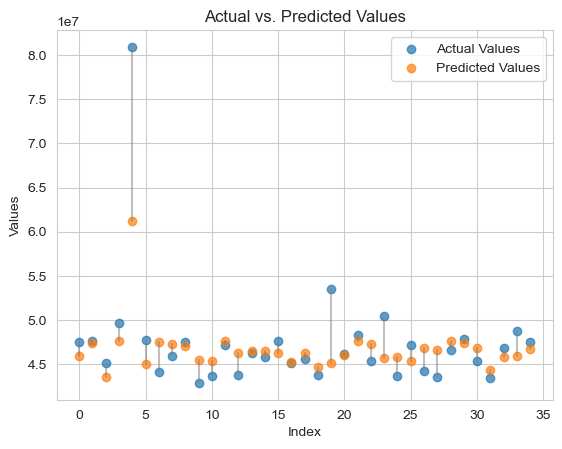

In [132]:
# NEW: Plot the two columns as two different series with different colors
plt.scatter(df.index, df['Actual Values'], label='Actual Values', alpha = 0.7)
plt.scatter(df.index, df['Predicted Values'], label='Predicted Values', alpha = 0.7)

# Add line segments between each pair of points that share the same index value
for i in range(len(df)):
    plt.plot([i, i], [df.iloc[i]['Actual Values'], df.iloc[i]['Predicted Values']], color='gray', alpha=0.5)


# Set axis labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Display the plot
plt.show()


## Run the model for the full data set

In [136]:
X_all_scaled = scaler.transform(X)

In [137]:
predictions_full = rf_model.predict(X_all_scaled)

In [138]:
walmart_df_agg_with_pred = walmart_df_agg.copy()
walmart_df_agg_with_pred['predictions'] = predictions_full

walmart_df_agg_with_pred.head()

,year,week_of_year,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IS_XMAS,IS_SUPERBOWL,IS_TGIVING,IS_LABORDAY,IS_NEAR_TGIVING,IS_NEAR_XMAS,Weekly_Sales_Lag1,Weekly_Sales_Lag4,predictions
4,2010,9,46871470.30,42.373998,2.731816,167.727351,8.572689,0,0,0,0,0,0,43968571.13,49750740.50,4.626239e+07
5,2010,10,45925396.51,46.967143,2.774452,167.504162,8.580858,0,0,0,0,0,0,46871470.30,48336677.63,4.591960e+07
6,2010,11,44988974.64,49.481019,2.816063,167.478101,8.571996,0,0,0,0,0,0,45925396.51,48276993.78,4.509394e+07
7,2010,12,44133961.05,47.979325,2.823610,167.510338,8.575041,0,0,0,0,0,0,44988974.64,43968571.13,4.452979e+07
8,2010,13,50423831.26,52.587887,2.825453,167.377836,8.441092,0,0,0,0,0,0,44133961.05,46871470.30,4.574727e+07


In [139]:
# Melt the data frame to long format
walmart_df_long = pd.melt(walmart_df_agg_with_pred, id_vars=['year', 'week_of_year', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], value_vars=['Weekly_Sales', 'predictions'], var_name='Type', value_name='Value')

# Sort the data frame by date and type
walmart_df_long = walmart_df_long.sort_values(['year', 'week_of_year'])

# Reset the index
walmart_df_long = walmart_df_long.reset_index(drop=True)

walmart_df_long.head()


,year,week_of_year,Temperature,Fuel_Price,CPI,Unemployment,Type,Value
0,2010,9,42.373998,2.731816,167.727351,8.572689,Weekly_Sales,4.687147e+07
1,2010,9,42.373998,2.731816,167.727351,8.572689,predictions,4.626239e+07
2,2010,10,46.967143,2.774452,167.504162,8.580858,Weekly_Sales,4.592540e+07
3,2010,10,46.967143,2.774452,167.504162,8.580858,predictions,4.591960e+07
4,2010,11,49.481019,2.816063,167.478101,8.571996,Weekly_Sales,4.498897e+07


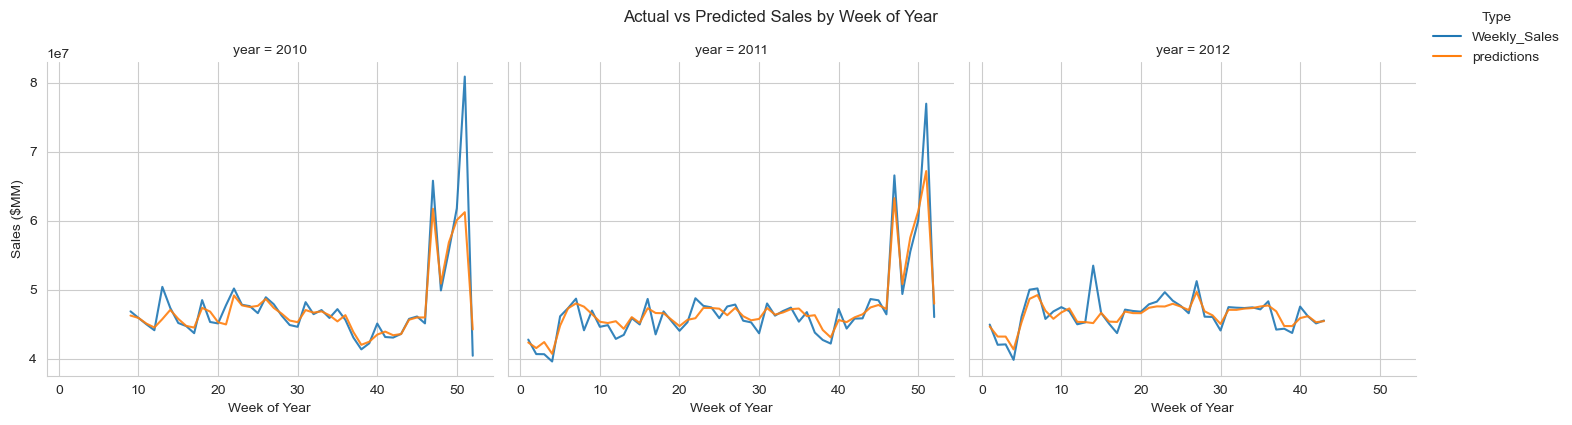

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set_style('whitegrid')

# Create the line plot
fig = sns.relplot(x='week_of_year', y='Value', hue='Type', col='year', col_wrap=3,
                  data=walmart_df_long, kind='line', height=4, aspect=1.2, alpha = 0.9)

# Set the x-axis label
fig.set_xlabels('Week of Year')

# Set the y-axis label
fig.set_ylabels('Sales ($MM)')

# Set the title
fig.fig.suptitle('Actual vs Predicted Sales by Week of Year', y=1.05)

# Move the legend 
sns.move_legend(fig, 'upper right')

# Show the plot
plt.show()
